## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Load and Explore Data

In [2]:
df = pd.read_csv('data/Aviation_data.csv')
df.head()

C:\Users\taing\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

I realize there are several columns that not needed for my analysis. Thus, I decided to drop them to partly simplify the dataframe.

In [4]:
drop_columns = ['Event.Id', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name','Registration.Number',
               'FAR.Description','Schedule','Publication.Date']
df.drop(drop_columns, axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Air.carrier             16648 non-null  object 
 14  Total.Fatal.Injuries    77488 non-null

### 2. Clean Data

Some columns contains combined information such as Location and Injury Severity. I decided to split these columns so I can improve the detail of the dataframe.

In [6]:
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df['Injury Severity'] = df['Injury.Severity'].str.split('(').str[0]
df.drop(['Location','Injury.Severity'], axis = 1, inplace = True)

In the Investigation Type column, there are cells with date info which needed to be excluded as those cells associated with blank rows.

In [7]:
df = df[df['Investigation.Type'].str.lower().str.contains('cident')]

As the Event.Date are of string data type, I decide to convert them all to date type and create a new column hosting year of the event

In [8]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event Year'] = df['Event.Date'].dt.year

Now, I need to find a way to fix the NaN problems as there is a lot of blank cells. First, with numeric columns, I decide to fill NaN values with zero instead of any other statistical measure. The reason is that using a mean or median may cause significant bias given this data set recording fatalities of aviation accidents. Knowing the probabilities of aviation accident is low compared to the number of flights around the world, it is safe to assume zero fatalities would work as a placeholder for numeric columns' NaN values. On the other hand, many categorical columns use "Unknown" as a placeholder for no-info. Therefore, I will fill "Unknown" into NaN values.

In [9]:
df.isna().sum()

Investigation.Type            0
Event.Date                    0
Country                     226
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
City                         52
State                       559
Injury Severity            1000
Event Year                    0
dtype: int64

In [10]:
num_columns = df.select_dtypes(include=['float64']).columns
df[num_columns] = df[num_columns].fillna(0)
df = df.fillna('Unknown')

In [11]:
#Checking the number of nan values in dataframe after cleaning
df.isna().sum()

Investigation.Type        0
Event.Date                0
Country                   0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
City                      0
State                     0
Injury Severity           0
Event Year                0
dtype: int64

I decide to filter out Amateur-built aircraft as our company should only invest in the public brand which had been proven overtime. Moreover, as company wants to focus on airplane investment for commercial and private enterprises, it is best to exclude other aircraft categories.

In [12]:
df = df[df['Amateur.Built'] == 'No']
df = df[df['Aircraft.Category'] == 'Airplane']

The Make columns show different aircraft makers. However, many of those names, while pointing to the same brand, but having different format such as capitalize vs. title. Among those, Boeing and Airbus should be the most notable. I will make all the maker name using title style format.

In [13]:
df['Make'] = df['Make'].str.title()
df.loc[df['Make'].str.lower().str.contains('airbus'),'Make'] = 'Airbus'

It is time to start analyzing the data in details.

### 3. Data Exploratory

First, let's see if there is more or less airplane accidents as time progress. We will need to build a time line series.

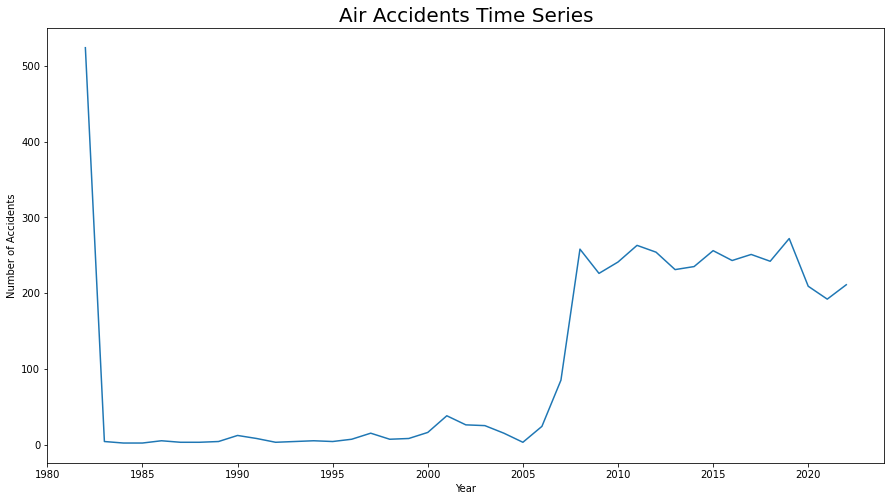

In [14]:
fatal = df[df['Total.Fatal.Injuries'] > 0]['Event Year'].value_counts()
plt.subplots(figsize = (15,8))
sns.lineplot(x = fatal.index , y = fatal.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Air Accidents Time Series', size = 20);

Looks like the number of fatal airplane accidents increase significantly after 2005. 1982 would be considered as an outlier in this sample. This can be considered as a result of air traffic booming the past 2 decades. As technology innovates and economic conditions improve, it is much easier for general public to travel by air. However, with the increase of air traffic, it also leads to a significant increase of fatal air accidents.

Second, let's look at which countries have the most air accidents? was it due to low economic growth and innovation (third world countries) or maybe there are other factors. Here we look at top 10 countries that have the most air accidents

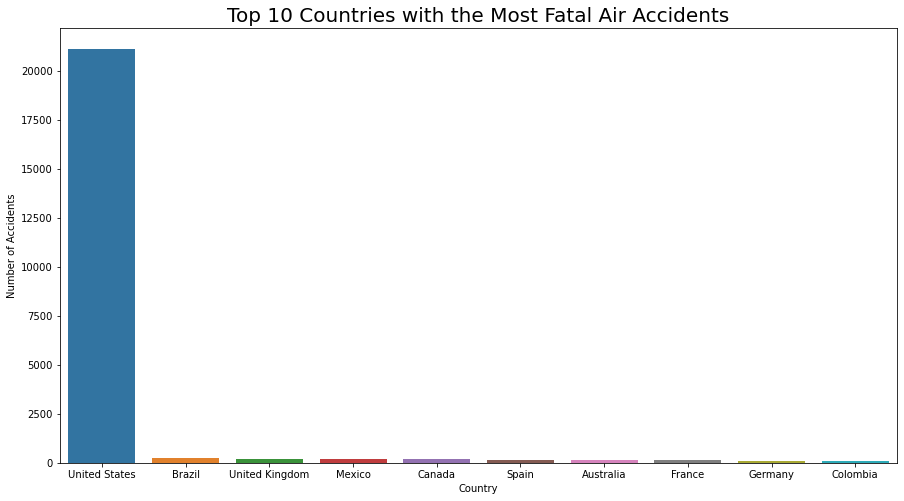

In [15]:
country_df = df[df['Country'] != 'Unknown']['Country'].value_counts()[:10]
plt.subplots(figsize = (15,8))
sns.barplot(x = country_df.index , y = country_df.values)
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Countries with the Most Fatal Air Accidents', size = 20);


It is safe to eliminate the assumption that low economic growth and lack of innovation are the causes of high air accidents. The chart shows that first world countries make up 7 spots in the top 10 most air accident countries around the world. Meanwhile, the U.S. ranked highest with the most air accidents, more than the total sum of all air accidents of the other 9 countries. While the U.S. is known with the most developed air infrastructure, it also records the highest number of air accidents.

Third, let's look at those makers that only have minor injuries or uninjured since the year 2000

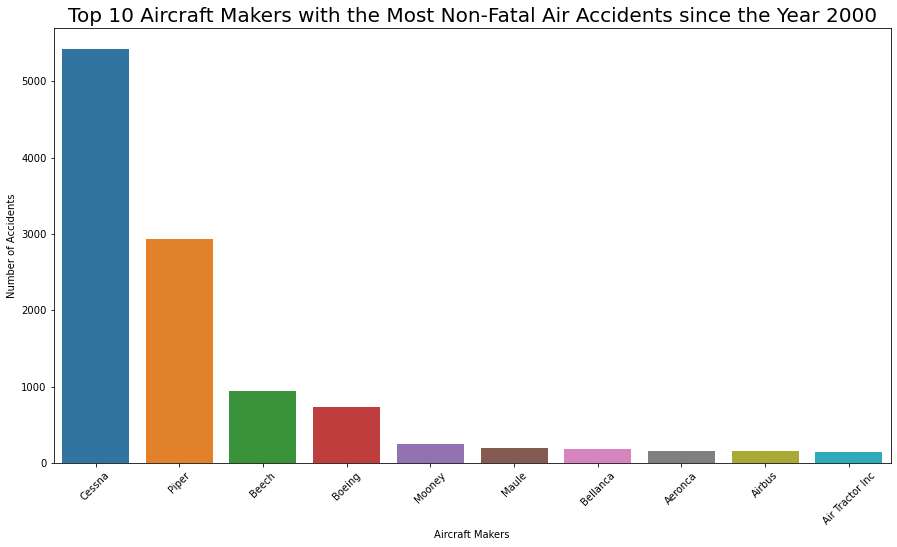

In [42]:
non_fatal = df[((df['Total.Minor.Injuries'] + df['Total.Uninjured']) > 0) & (df['Event Year'] > 2000)]['Make'].value_counts()[:10]
plt.subplots(figsize = (15,8))
sns.barplot(x = non_fatal.index , y = non_fatal.values)
plt.xlabel('Aircraft Makers')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Aircraft Makers with the Most Non-Fatal Air Accidents since the Year 2000', size = 20)
plt.xticks(rotation = 45);


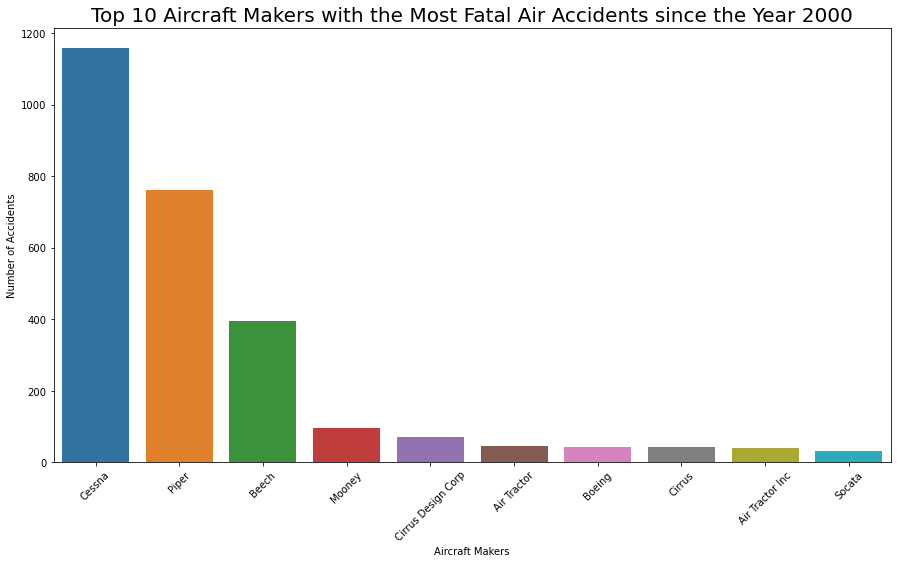

In [43]:
fatal = df[(df['Total.Fatal.Injuries'] > 0) & (df['Event Year'] > 2000)]['Make'].value_counts()[:10]
plt.subplots(figsize = (15,8))
sns.barplot(x = fatal.index , y = fatal.values)
plt.xlabel('Aircraft Makers')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Aircraft Makers with the Most Fatal Air Accidents since the Year 2000', size = 20)
plt.xticks(rotation = 45);


Even the first chart displays number of aviation accidents, it also show how these makers enforce safety in their making. 
If we cross selecting between the two charts (fatal vs. non-fatal) above, there are several makers that while popular but also safe for flight. Airbus should be a good pick for large aircraft makers due to its low fatal injuries incidents. On the other hand, for light aircraft, I should consider between several namems such as Maule, Bellanca, and Aeronca.

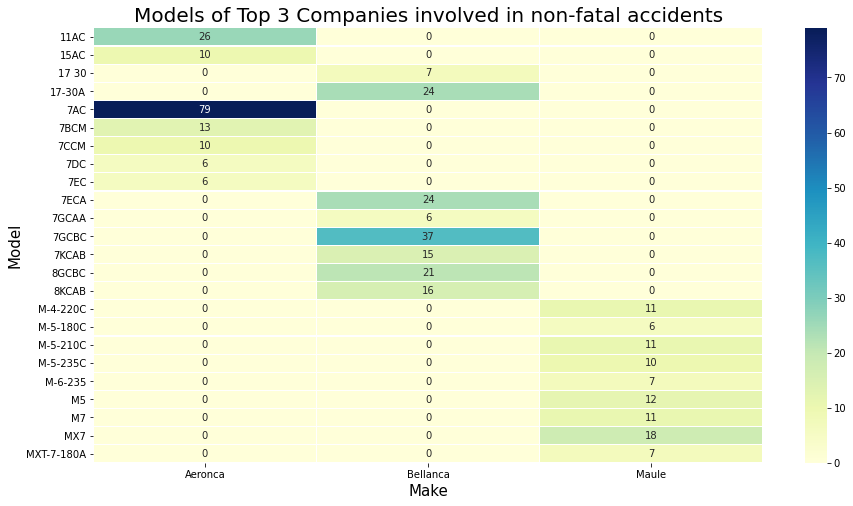

In [55]:
df1 = df.loc[df['Make'].str.lower().str.contains('|'.join(['maule','bellanca','aeronca']))]
df1 = df1[df1['Event Year'] > 2000]
df1 = df1[df1['Total.Fatal.Injuries'] == 0]
df1.loc[df1['Make'].str.lower().str.contains('maule'), 'Make'] = 'Maule'
df1.loc[df1['Make'].str.lower().str.contains('bellanca'), 'Make'] = 'Bellanca'
df1.loc[df1['Make'].str.lower().str.contains('aeronca'), 'Make'] = 'Aeronca'
tb = pd.pivot_table(df1, index=['Model'], columns=['Make'], values='Event.Date', aggfunc=np.count_nonzero, fill_value=0)
tb = tb[tb.values > 5]
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(tb, annot=True, fmt="d", linewidths=.1, ax=ax, linecolor='white', cmap='YlGnBu')
plt.xlabel("Make", size=15)
plt.ylabel("Model", size=15)
plt.title("Models of Top 3 Companies involved in non-fatal accidents", size=20);

Now, let's look at what is the most common phase in which accidents occurred?

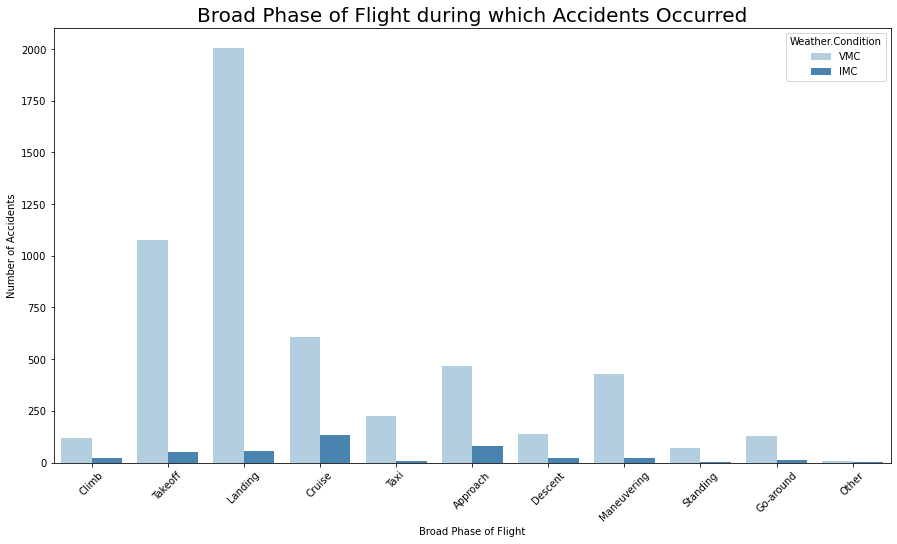

In [56]:
plt.subplots(figsize = (15,8))
ph = sns.countplot(data=df[(df['Broad.phase.of.flight'] != 'Unknown') & (~df['Weather.Condition'].str.lower().str.contains('unk'))], 
                   x='Broad.phase.of.flight', hue='Weather.Condition', linewidth=1, palette='Blues')
plt.xticks(rotation=45)
plt.xlabel("Broad Phase of Flight", size=10)
plt.ylabel("Number of Accidents", size=10)
plt.title("Broad Phase of Flight during which Accidents Occurred", size = 20);

The chart shows that most of the accidents occurred during either landing or take-off phases. Meanwhile, accidents occurred during Cruise and Maneuvering phases only take much smaller shares of the total airplane accidents in this dataset.

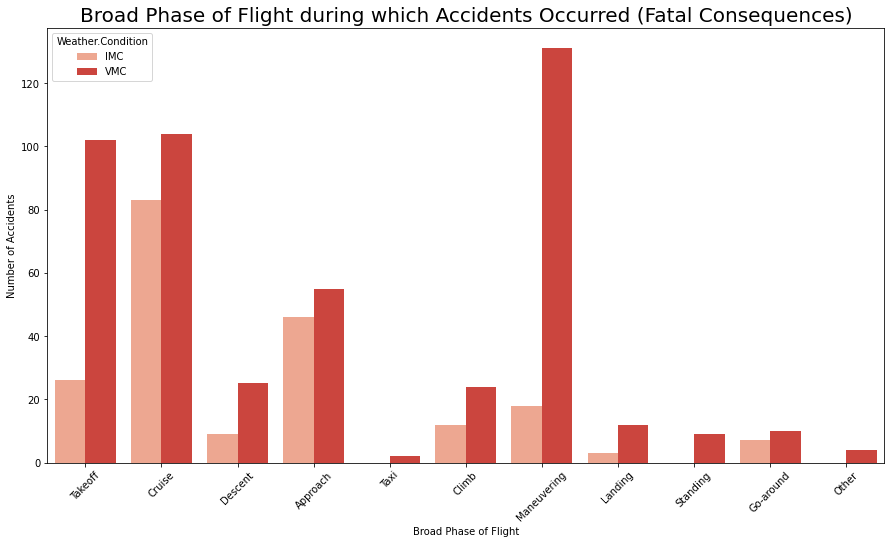

In [57]:
fatal = df[(df['Broad.phase.of.flight'] != 'Unknown') & (df['Total.Fatal.Injuries'] > 0)]
fatal = fatal[~fatal['Weather.Condition'].str.lower().str.contains('unk')]
plt.subplots(figsize = (15,8))
ph = sns.countplot(data=fatal, x='Broad.phase.of.flight', hue='Weather.Condition', linewidth=1, palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Broad Phase of Flight", size=10)
plt.ylabel("Number of Accidents", size=10)
plt.title("Broad Phase of Flight during which Accidents Occurred (Fatal Consequences)", size = 20);

When considering only fatal accidents, Cruise and Maneuvering phases emerge as two phases that cause many devastating airplane accidents. In good weather condition, most airplane accident occur during Maneuvering phases; meanwhile, Cruise phase mostly witness accidents during bad weather conditions. Causes of high accidents occured during Maneuvering phase despite good weather condition are often due to buzzing attempts by pilots rather than due to the engine failures.